In [110]:
import sys
import imp
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.optimize import curve_fit
from IPython.display import HTML
sys.path.append('..')
import pyava
imp.reload(pyava.ei_network)
imp.reload(pyava.avalanche)
from pyava.ei_network import ei_perc_2d
from pyava.visualize import show_movie
from pyava.avalanche import activation_movie, activation_cluster, run_network, compute_cluster_size, compute_cluster_dur

In [104]:
network_func = ei_perc_2d
param = dict(p_exc = 0.7,
             p = 0.85, 
             q = 0.4,
             tstep = 1000,
             refract_period=np.inf)
nb_repeats = 100
seed = 2
cluster_list = run_network(network_func, param, nb_repeats, seed=seed)

100%|██████████| 100/100 [06:18<00:00,  3.78s/it]


In [105]:
results = dict(param=param, np_repeats=nb_repeats, cluster_list=cluster_list, seed=seed)
fmt='%Y-%m-%d-%H-%M-%S'
timestamp = datetime.datetime.now().strftime(fmt)
print(timestamp)
np.save('results-{}.npy'.format(timestamp), results)

2021-06-18-15-51-08


[56 16  6  2  4  4  4  4  3  1]


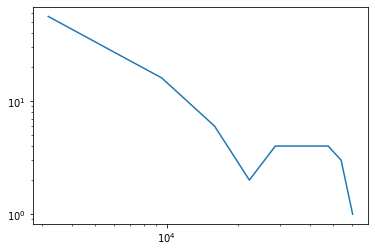

In [106]:
size_list = [compute_cluster_size(cluster) for cluster in cluster_list]
hsize, bin_edges = np.histogram(size_list)
print(hsize)
xx = (bin_edges[:-1] + bin_edges[1:])/2
plt.plot(xx, hsize)
plt.xscale('log')
plt.yscale('log')

[-1.22349204e+00  1.07982565e+06]


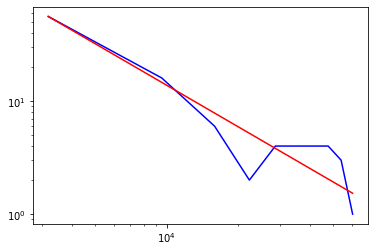

In [107]:
def powerlaw(x, m, c):
    return c * x**m
xdata = xx
ydata = hsize
popt, pcov = curve_fit(powerlaw, xdata, ydata, p0 = np.asarray([-1,10**4]))
print(popt)
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, powerlaw(xdata, *popt), 'r-',

         label='fit: m=%5.3f, c=%5.3f' % tuple(popt))
plt.xscale('log')
plt.yscale('log')

[41 13 10  6  5  5  4  5  3  8]


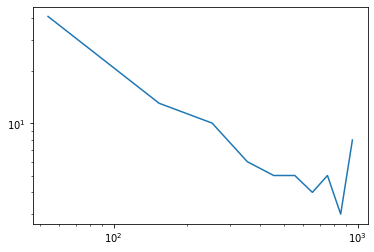

In [112]:
dur_list = [compute_cluster_dur(cluster) for cluster in cluster_list]
hsize, bin_edges = np.histogram(dur_list)
print(hsize)
xx = (bin_edges[:-1] + bin_edges[1:])/2
plt.plot(xx, hsize)
plt.xscale('log')
plt.yscale('log')

[-9.21939325e-01  1.59449757e+03]


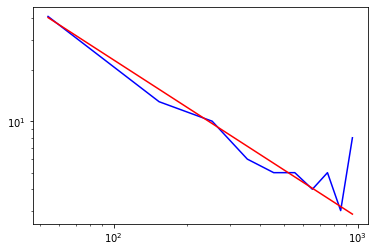

In [113]:
xdata = xx
ydata = hsize
popt, pcov = curve_fit(powerlaw, xdata, ydata, p0 = np.asarray([-1,10**4]))
print(popt)
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, powerlaw(xdata, *popt), 'r-',

         label='fit: m=%5.3f, c=%5.3f' % tuple(popt))
plt.xscale('log')
plt.yscale('log')

87.0


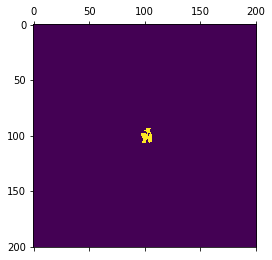

In [16]:
cluster = cluster_list[1]
cluster_img = activation_cluster(cluster, param['tstep'])
plt.matshow(cluster_img)
print(np.sum(cluster_img))

In [44]:
#p_exc = 0.7
#p = 0.9
p_exc = 1
p = 0.501
q = 0.2
tstep = 200
parent_dict_list = ei_perc_2d(p_exc, p, q, tstep, refract_period=np.inf)

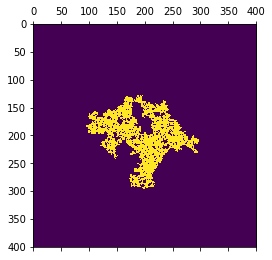

In [45]:
cluster_img = activation_cluster(parent_dict_list, tstep)
plt.matshow(cluster_img)

In [46]:
movie = activation_movie(parent_dict_list, tstep)
ani = show_movie(movie)
HTML(ani.to_html5_video())

In [73]:
p_exc = 0.7
p = 0.9
q = 0.4
tstep = 200
parent_dict_list = ei_perc_2d(p_exc, p, q, tstep, refract_period=np.inf)
print(len(parent_dict_list))
movie = activation_movie(parent_dict_list, tstep)

202


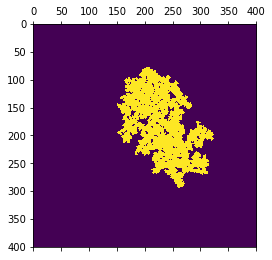

In [74]:
cluster_img = activation_cluster(parent_dict_list, tstep)
plt.matshow(cluster_img)

In [75]:
ani = show_movie(movie)
HTML(ani.to_html5_video())

In [54]:
# Excitatory-Dead network
p_exc = 0.7
p = 0.9
q = 0
tstep = 200
parent_dict_list = ei_perc_2d(p_exc, p, q, tstep, refract_period=1)
print(len(parent_dict_list))
movie = activation_movie(parent_dict_list, tstep)

202


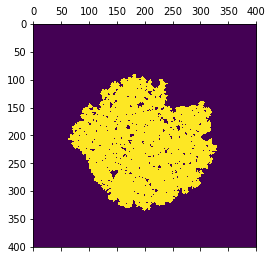

In [55]:
cluster_img = activation_cluster(parent_dict_list, tstep)
plt.matshow(cluster_img)

In [56]:
ani = show_movie(movie)
HTML(ani.to_html5_video())